/home/camila/.local/lib/python3.6/site-packages/cana/thermal/models.py:32: RuntimeWarning: overflow encountered in exp
  aux = np.exp(h_planck * c_light / k_bol / wavelength / temp)


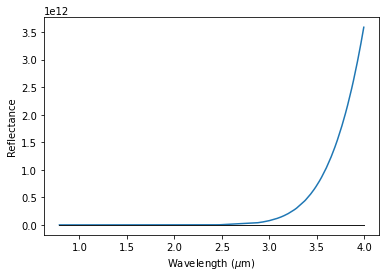

In [2]:
import cana
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt
from cana.datasets import getspectrum

svea = cana.loadspec("svea-rebin.txt")
svea = svea.normalize(1.2)
svea.plot()

def func(albedo, wave = svea.w):
    phi = 22.26 #angulo de fase
    distancia_do_sol = 2.42
    distancia_da_terra = 1.86
    m = cana.NEATM(distancia_do_sol, distancia_da_terra, phi, eta = 0.9)
    magnitude_absoluta = 9.66
    diametro = (1329/np.sqrt(albedo))*(10**(-0.2*magnitude_absoluta))
    thermal_spec = m.flux(albedo, diametro, wavelengths=wave)
    thermal_spec = thermal_spec.normalize(1.2)
    return thermal_spec.r

r = func(0.05)
plt.plot(svea.w, r)

#alpha = optimize.curve_fit(func, xdata = thermal_spec.w, ydata = thermal_spec.r)[0]

#thermal_spec.plot()